In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
test_data = h5py.File("data/clean_test_data.h5",'r')

OSError: Unable to open file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')

In [3]:
test = tf.convert_to_tensor(test_data['data'])

In [4]:
test_label = tf.convert_to_tensor(test_data['label'])
type(test_label)

tensorflow.python.framework.ops.EagerTensor

In [5]:
test_label

<tf.Tensor: shape=(12830,), dtype=int32, numpy=array([950, 992, 823, ..., 770, 304, 872], dtype=int32)>

In [6]:
test[0].shape

TensorShape([3, 55, 47])

In [7]:
test.shape

TensorShape([12830, 3, 55, 47])

In [8]:
test1 = tf.transpose(test, [0,2,3,1])

In [9]:
test1_np = test1.numpy()

In [10]:
type(test1_np)

numpy.ndarray

In [11]:
test1.shape

TensorShape([12830, 55, 47, 3])

In [12]:
test1_np = test1_np/255

In [13]:
test1_np[0].shape

(55, 47, 3)

In [14]:
test1_np[0]

array([[[1.        , 0.99607843, 0.9490196 ],
        [0.9882353 , 0.98039216, 0.92941177],
        [0.93333334, 0.9372549 , 0.88235295],
        ...,
        [0.00392157, 0.        , 0.        ],
        [0.01176471, 0.00392157, 0.01568628],
        [0.00784314, 0.        , 0.02352941]],

       [[0.98039216, 0.96862745, 0.9098039 ],
        [1.        , 1.        , 0.94509804],
        [0.99215686, 0.9882353 , 0.91764706],
        ...,
        [0.00392157, 0.        , 0.        ],
        [0.00392157, 0.        , 0.00784314],
        [0.00392157, 0.        , 0.01960784]],

       [[1.        , 1.        , 0.9254902 ],
        [1.        , 1.        , 0.91764706],
        [0.9019608 , 0.8784314 , 0.78431374],
        ...,
        [0.04705882, 0.04313726, 0.03529412],
        [0.02352941, 0.01568628, 0.02745098],
        [0.00392157, 0.        , 0.01960784]],

       ...,

       [[0.42745098, 0.23529412, 0.11764706],
        [0.31764707, 0.13333334, 0.01568628],
        [0.32156864, 0

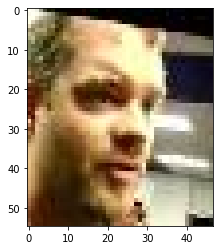

In [15]:
a = plt.imshow(test1_np[0])

In [16]:
a

In [17]:
# plt.savefig('/Users/vishaal811/Desktop', bbox_inches="tight")

In [18]:
plt.imsave('test.png', test1_np[0])

In [19]:
import matplotlib.image as mpimg
img = mpimg.imread('test.png')
print('Shape of output image is:', img.shape)
print(type(img))

Shape of output image is: (55, 47, 4)
<class 'numpy.ndarray'>


In [20]:
img.shape

(55, 47, 4)

In [21]:
img = img[:, :, :3]
img.shape

(55, 47, 3)

In [22]:
type(img)

numpy.ndarray

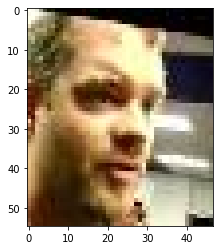

In [23]:
plt.imshow(img)

In [24]:
from tensorflow import keras

In [25]:
# model = keras.models.load_model('models/new_architecture_mixture_trained_net.h5')

In [26]:
model = keras.models.load_model('models/new_architecture_mixture_trained_net_processed.h5')

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 55, 47, 3)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[0][0]                     
______________________________________________________________________________________________

In [28]:
img.shape

(55, 47, 3)

In [29]:
img1 = img.reshape([1] + list(img.shape))

In [30]:
img1.shape

(1, 55, 47, 3)

In [31]:
img1 = tf.convert_to_tensor(img1)

In [32]:
type(img1)

tensorflow.python.framework.ops.EagerTensor

In [33]:
import pandas as pd
s = pd.Series(test_label)
s

0         950
1         992
2         823
3         949
4        1274
         ... 
12825     427
12826     694
12827     770
12828     304
12829     872
Length: 12830, dtype: int32

In [34]:
np.argmax(model.predict(img1))

361

In [35]:
poisoned_data = h5py.File("data/sunglasses_poisoned_data.h5",'r')

In [36]:
poison_data = tf.convert_to_tensor(poisoned_data['data'])
poison_label = tf.convert_to_tensor(poisoned_data['label'])
poison_data.shape

TensorShape([12830, 3, 55, 47])

In [37]:
poison_data1 = tf.transpose(poison_data, [0,2,3,1])
poison_data1.shape

TensorShape([12830, 55, 47, 3])

In [38]:
poison_data1.shape

TensorShape([12830, 55, 47, 3])

In [39]:
poison_data1 = poison_data1/255
poison_data1

<tf.Tensor: shape=(12830, 55, 47, 3), dtype=float32, numpy=
array([[[[1.        , 0.99607843, 0.9490196 ],
         [0.9882353 , 0.98039216, 0.92941177],
         [0.93333334, 0.9372549 , 0.88235295],
         ...,
         [0.00392157, 0.        , 0.        ],
         [0.01176471, 0.00392157, 0.01568628],
         [0.00784314, 0.        , 0.02352941]],

        [[0.98039216, 0.96862745, 0.9098039 ],
         [1.        , 1.        , 0.94509804],
         [0.99215686, 0.9882353 , 0.91764706],
         ...,
         [0.00392157, 0.        , 0.        ],
         [0.00392157, 0.        , 0.00784314],
         [0.00392157, 0.        , 0.01960784]],

        [[1.        , 1.        , 0.9254902 ],
         [1.        , 1.        , 0.91764706],
         [0.9019608 , 0.8784314 , 0.78431374],
         ...,
         [0.04705882, 0.04313726, 0.03529412],
         [0.02352941, 0.01568628, 0.02745098],
         [0.00392157, 0.        , 0.01960784]],

        ...,

        [[0.42745098, 0.23529412

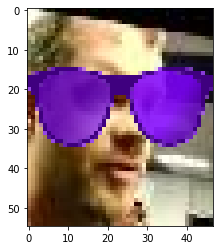

In [40]:
a = plt.imshow(poison_data1[0])

In [41]:
type(poison_data1[0].numpy())

numpy.ndarray

In [42]:
plt.imsave('poison.png', poison_data1[0].numpy())

In [43]:
img = mpimg.imread('poison.png')
print('Shape of output image is:', img.shape)
print(type(img))

Shape of output image is: (55, 47, 4)
<class 'numpy.ndarray'>


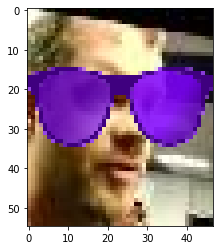

In [44]:
plt.imshow(img)
img = img[:, :, :3]

In [45]:
img.shape

(55, 47, 3)

In [46]:
img1 = img.reshape([1] + list(img.shape))
img1 = tf.convert_to_tensor(img1)
img1.shape

TensorShape([1, 55, 47, 3])

In [54]:
tst = poison_data1[567]
tst = tst.numpy()

In [55]:
tst = tst.reshape([1] + list(tst.shape))
tst = tf.convert_to_tensor(tst)
tst.shape

TensorShape([1, 55, 47, 3])

In [56]:
np.argmax(model.predict(tst))

1283

In [50]:
poison_label
s = pd.Series(poison_label)
s

0        0
1        0
2        0
3        0
4        0
        ..
12825    0
12826    0
12827    0
12828    0
12829    0
Length: 12830, dtype: int32